In [1]:
%load_ext autoreload
%autoreload 2

In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from DarkNews import plot_tools as pt

from alp import exp, models

In [1041]:
def make_rate_table(EXP, save=True, inv_fa_range=[0.5e-9,1e-4], ma_range=[1e-2, const.m_tau - const.m_e], Npoints=101, c_lepton=False, name=''):
    inv_fas = np.geomspace(*inv_fa_range, Npoints, endpoint=True)
    m_alps = np.linspace(*ma_range, Npoints, endpoint=True)
    MA, INV_FA = np.meshgrid(m_alps, inv_fas)

    z = []
    for ma in m_alps:
        alp_1 = models.ALP(ma, 1e7)
        EXP.get_event_rate(alp_1)
        for inv_fa in inv_fas:
            alp_2 = models.ALP(ma, 1/inv_fa, c_lepton=c_lepton)
            r = EXP.reweight(alp_1, alp_2)
            # r = EXP.get_event_rate(alp_2)
            z.append(r)
   
    Z = np.reshape(z, MA.shape).T
    # print(Z.shape, MA.shape, INV_FA.shape)

    if save:
        np.save(f'data/{EXP.name}_rates{name}.npy', [MA,INV_FA,Z])
    return MA, INV_FA, Z

In [1046]:
### Pythia8 tau events
NUMI_files = [f"pythia8_events/tau_events_NuMI_120GeV_v3_{i}.txt" for i in range(0, 8)]
SPS_files = [f"pythia8_events/tau_events_SPS_400GeV_v3_{i}.txt" for i in range(0, 8)]
LHC_files = [f"pythia8_events/tau_events_LHC_13.6TeV_v6_{i}.txt" for i in range(0, 8)]


### Creating the experimental classes 
ICARUS = exp.Experiment(NUMI_files, exp_dic=exp.ICARUS_exp)
MICROBOONE = exp.Experiment(NUMI_files, exp_dic=exp.MicroBooNE_exp)
NOVA = exp.Experiment(NUMI_files, exp_dic=exp.NoVA_exp)

CHARM = exp.Experiment(SPS_files, exp_dic=exp.CHARM_exp)
BEBC = exp.Experiment(SPS_files, exp_dic=exp.BEBC_exp)
NA62 = exp.Experiment(SPS_files, exp_dic=exp.NA62_exp)
SHIP = exp.Experiment(SPS_files, exp_dic=exp.SHiP_exp)

FASER = exp.Experiment(LHC_files, exp_dic=exp.FASER_exp)
FASER2 = exp.Experiment(LHC_files, exp_dic=exp.FASER2_exp)

In [1060]:
# lamb = 0.05
# c_12 = lamb
# c_23 = lamb
# c_13 = lamb**2
# c_lepton = np.array([[1,c_12,c_13], [c_12,1,c_23], [c_13,c_23,1]])

lamb = 0.05
c_12 = lamb
c_23 = lamb
c_13 = lamb**2
c_lepton = np.array([[1,    lamb**3, lamb**2], 
                     [lamb**3, 1,       lamb**2], 
                     [lamb**2, lamb**2, 1]])

In [1061]:
invfa_range=[1e-8,1e-2]
make_rate_table(ICARUS,     save=True, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)
make_rate_table(MICROBOONE, save=True, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)
make_rate_table(NOVA,       save=True, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)

make_rate_table(CHARM,  save=True, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)
make_rate_table(BEBC,   save=True, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)
make_rate_table(NA62,   save=True, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)
make_rate_table(SHIP,   save=True, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)

make_rate_table(FASER, save=True, Npoints=101, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)
make_rate_table(FASER2, save=True, Npoints=101, inv_fa_range=invfa_range, name='_bp2', c_lepton=c_lepton)

(array([[0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        ...,
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ]]),
 array([[1.00000000e-08, 1.00000000e-08, 1.00000000e-08, ...,
         1.00000000e-08, 1.00000000e-08, 1.00000000e-08],
        [1.14815362e-08, 1.14815362e-08, 1.14815362e-08, ...,
         1.14815362e-08, 1.14815362e-08, 1.14815362e-08],
        [1.31825674e-08, 1.31825674e-08, 1.31825674e-08, ...,
         1.31825674e-08, 1.31825674e-08, 1.31825674e-08],
        ...,
        [7.58577575e-03, 7.58577575e

In [ ]:
# make_rate_table(ICARUS, save=True, Npoints=501)
# make_rate_table(MICROBOONE, save=True)
# make_rate_table(NOVA, save=True)

# make_rate_table(CHARM, save=True, Npoints=201)
# make_rate_table(BEBC, save=True)
# make_rate_table(NA62, save=True)
# make_rate_table(SHIP, save=True, inv_fa_range=[1e-10,1e-4], Npoints=501)

make_rate_table(FASER, save=True, Npoints=101, inv_fa_range=[1e-8,1e-3])
make_rate_table(FASER2, save=True, Npoints=101, inv_fa_range=[1e-9,1e-3])

/Users/mhostert/Repos/tau_LLPs/alp/exp.py:317: RuntimeWarning: invalid value encountered in scalar divide
  #     m_alp = 0.5


(array([[0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        ...,
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ],
        [0.01      , 0.02766349, 0.04532698, ..., 1.74102202, 1.75868551,
         1.776349  ]]),
 array([[1.00000000e-09, 1.00000000e-09, 1.00000000e-09, ...,
         1.00000000e-09, 1.00000000e-09, 1.00000000e-09],
        [1.14815362e-09, 1.14815362e-09, 1.14815362e-09, ...,
         1.14815362e-09, 1.14815362e-09, 1.14815362e-09],
        [1.31825674e-09, 1.31825674e-09, 1.31825674e-09, ...,
         1.31825674e-09, 1.31825674e-09, 1.31825674e-09],
        ...,
        [7.58577575e-04, 7.58577575e

Text(0, 0.5, '$dN/d E_{\\mathrm{ALP}}$')

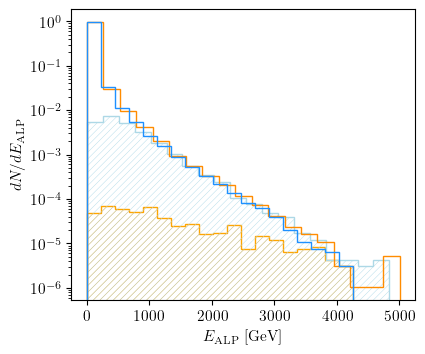

In [978]:
model = models.ALP(0.5, 1e5)

dp, b = FASER.get_alp_spectrum(model, selection=False)
plt.hist(b[:-1], bins=b, weights=dp, histtype='step', edgecolor='darkorange', facecolor='None',  linestyle='-')

dp, b = FASER.get_alp_spectrum(model, selection=True)
plt.hist(b[:-1], bins=b, weights=dp * FASER.geom_acceptance, histtype='stepfilled', edgecolor='orange', facecolor='None', hatch='/////', linestyle='-')


dp, b = FASER2.get_alp_spectrum(model, selection=False)
plt.hist(b[:-1], bins=b, weights=dp, histtype='step', edgecolor='dodgerblue', facecolor='None',  linestyle='-')

dp, b = FASER2.get_alp_spectrum(model, selection=True)
plt.hist(b[:-1], bins=b, weights=dp * FASER2.geom_acceptance, histtype='stepfilled', edgecolor='lightblue', facecolor='None', hatch='/////', linestyle='-')

plt.semilogy()
plt.xlabel(r'$E_{\mathrm{ALP}}$ [GeV]')
plt.ylabel(r'$dN/d E_{\mathrm{ALP}}$')

In [1039]:
model = models.ALP(0.5, 1e6)
FASER2.get_event_rate(model)/1e6

np.float64(1.2901230481837243)

In [950]:
FASER2.get_event_rate()/1e8, FASER2.get_event_rate(models.ALP(0.5, 1e6), selection=False)/1e11

(np.float64(2.4178753160059165), np.float64(1.909585962729401))

AttributeError: 'numpy.float64' object has no attribute 'm_a'

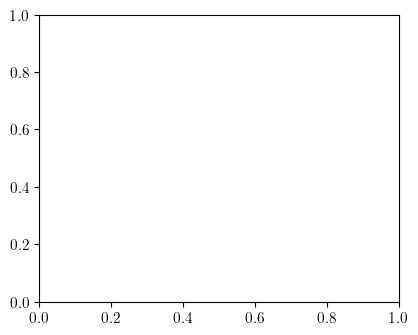

In [619]:
fig, ax = pt.std_fig()

malps = np.geomspace(2e-3, 1.6, 100)

for experiment in [ICARUS, MICROBOONE, NOVA, CHARM, NA62, BEBC, SHIP, FASER, FASER2]:
    effs = []
    for m in malps:
        experiment.get_alp_spectrum(m)
        effs.append(experiment.geom_acceptance)

    ax.plot(malps, effs, label=experiment.name)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(ncol=2)
ax.set_xlabel(r'$m_{a}$ [GeV]')
fig.savefig('plots/acceptance_versus_alp_mass.pdf', bbox_inches='tight', dpi=300)

NameError: name 'ctheta_tau_LAB' is not defined

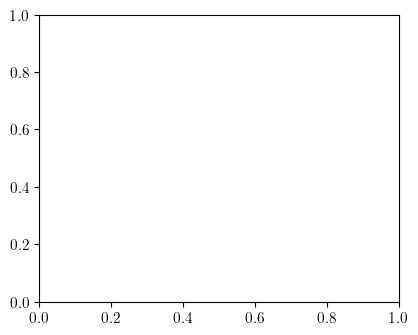

In [31]:
bins = np.linspace(0,50,30)
fig, ax = pt.std_fig()
_ = ax.hist(np.arccos(ctheta_tau_LAB)*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(theta_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)
# _ = plt.hist(df_taus.p, bins=20, histtype='step', color='black')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/theta_tau_alp.pdf', bbox_inches='tight', dpi=300)

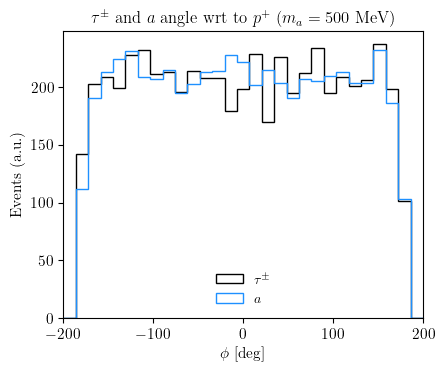

In [78]:
bins = np.linspace(-200,200,30)
fig, ax = pt.std_fig()
_ = ax.hist(phitau_LAB*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(phi_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\phi$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/phi_tau_alp.pdf', bbox_inches='tight', dpi=300)

In [86]:
Npoints=101
inv_fa = np.geomspace(1e-9,1e-2, Npoints, endpoint=True)
ma = np.geomspace(2e-3, const.m_tau - const.m_mu, Npoints, endpoint=True)
X, Y = np.meshgrid(ma, inv_fa)

def get_event_rate(ma, fa, dPhidp=1, palp=10, geom_acceptance = eff_dphi*0.03):
    if np.array(palp).size > 1:
        dp = np.diff(palp)
        pc = palp[:-1]+dp/2
        return tau_BR(ma, fa)*np.sum(dp*dPhidp*prob_decay(ma, pc, Gamma_alp(ma, fa), L, dZ)) * norm * geom_acceptance 
    else:
         return tau_BR(ma, fa)*dPhidp*prob_decay(ma, palp, Gamma_alp(ma, fa), L, dZ) * norm * geom_acceptance 

z = []
effs = []
for x, y in zip(X.ravel(), Y.ravel()):
    dPhidp, pb, eff = get_alp_spectrum(df_taus, x)
    effs.append(eff)
    z.append(get_event_rate(x, 1/y, dPhidp=dPhidp, palp=pb, geom_acceptance=eff_dphi * eff))

Z = np.reshape(z, X.shape)
EFFS = np.reshape(effs, X.shape)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)


In [87]:
const.get_decay_rate_in_cm(Gamma_alp(1, 1e10) * 100 )  / 1e5

np.float64(301.2588462919711)

In [88]:
np.save('data/ICARUS_rate.npy', [X,Y,Z])

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:16: RuntimeWarning: invalid value encountered in sqrt
  gamma_ee = np.where(ma > 2*const.m_e, 1/8/np.pi * ma / f_a**2 * const.m_e**2 * np.sqrt(1 - 4 * const.m_e**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/3989625455.py:31: UserWarning: linewidths is ignored by contourf
  c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey

(0.01, 3)

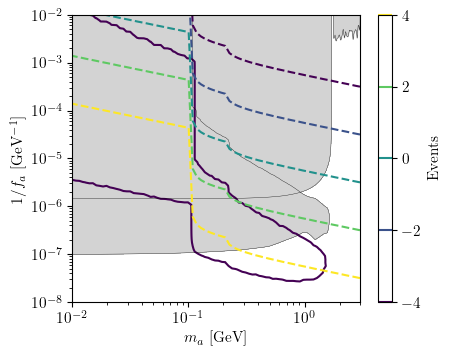

In [129]:
fig, ax = pt.std_fig()

X,Y,Z = np.load('data/ICARUS_rate.npy', allow_pickle=True)
c = ax.contour(X, Y, Z, levels=[1000])

# BaBar Limit
ma, qsi = np.genfromtxt("data/digitized/BABAR_leptophilic.dat", unpack=True)
ax.fill_between(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, qsi/qsi, label='BABAR', color='lightgrey', linestyle='-')
ax.plot(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, label='BABAR', color='black', linestyle='-', lw=0.25)

# Tau --> e alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_e, 1000)
# br_tau_to_e_alp = np.where(ma < const.m_tau - const.m_e, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(2.7e-3/br_tau_to_e_alp), np.sqrt(1/br_tau_to_e_alp), facecolor='lightgrey', edgecolor='black', linestyle='--', zorder=-100)

# # Tau --> mu alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_mu, 1000)
# br_tau_to_mu_alp = np.where(ma < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(4.5e-3/br_tau_to_mu_alp), np.sqrt(1/br_tau_to_mu_alp), facecolor='lightgrey', edgecolor='black', linestyle=':', zorder=-100)

ma = np.geomspace(1e-3, 3, 100)
inv_fa = np.geomspace(1e-9,1e-2, 100, endpoint=True)
MA, INV_FA = np.meshgrid(ma, inv_fa)

ma_limit, B_limit_90CL = np.genfromtxt("data/digitized/BelleII_tau_to_mu_a.dat", unpack=True)
B_limit_90CL_interp = np.interp(MA, ma_limit, B_limit_90CL, left=1e100, right=1e100)

p_alp_avg = 10.58/4
P_decay = prob_decay(MA, p_alp_avg, Gamma_alp(MA, 1/INV_FA), 100, 100e100) # 10 cm travel
BR_tau_mu_a = 1/B_limit_90CL_interp * P_decay * np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], linestyles='-', linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)

BR_tau_mu_a = np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1e-1,1e100], colors=['lightgrey'], linestyles='-',linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1e-1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)



Z = const.get_decay_rate_in_cm(Gamma_alp(MA, 1/INV_FA))
c=ax.contour(MA, INV_FA, np.log10(Z), levels=[-4,-2,0,2,4], cmap='viridis', linestyles='--', lw=0.1, alpha=1)
plt.colorbar(c, label='Events')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$m_a$ [GeV]')

ax.set_ylim(1e-8,1e-2)
ax.set_xlim(1e-2,3)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DarkNews import const
from DarkNews import Cfourvec as Cfv
from DarkNews import plot_tools as pt

from alp import exp, models

In [ ]:
tau_per_POT = 5e-7
N_POT_NUMI = 3e21
norm = tau_per_POT * N_POT_NUMI
NUMI_files = [f"pythia8_events/tau_events_{i}.txt" for i in range(0, 7)]

ICARUS = exp.Experiment(NUMI_files, name="ICARUS", L = 803e2, theta0=5.55, dX = 2*2.67e2, dY = 2.86e2, dZ = 17.86e2, norm=norm)
test_alp = models.ALP(1e9, 0.1)

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


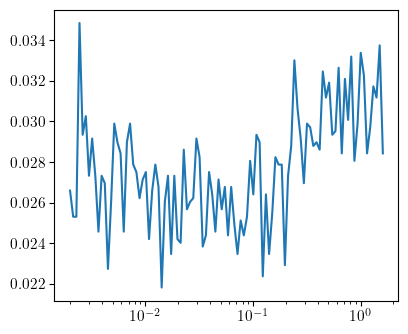

In [ ]:
malps = np.geomspace(2e-3, 1.6, 100)
effs = []
for m in malps:
    _, _, eff = get_alp_spectrum(df_taus, m)
    effs.append(eff)
plt.plot(malps, effs)
plt.xscale('log')

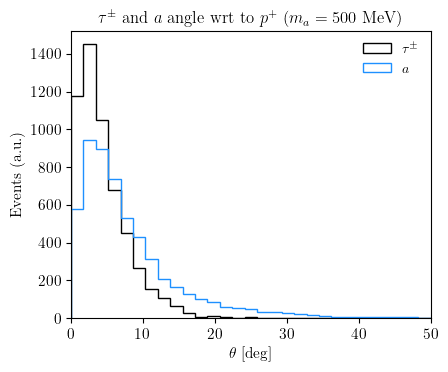

In [ ]:
bins = np.linspace(0,50,30)
fig, ax = pt.std_fig()
_ = ax.hist(np.arccos(ctheta_tau_LAB)*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(theta_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)
# _ = plt.hist(df_taus.p, bins=20, histtype='step', color='black')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/theta_tau_alp.pdf', bbox_inches='tight', dpi=300)

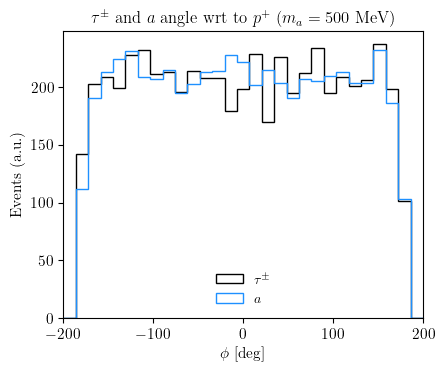

In [ ]:
bins = np.linspace(-200,200,30)
fig, ax = pt.std_fig()
_ = ax.hist(phitau_LAB*180/np.pi, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(phi_alp_deg, bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)

ax.set_title(fr'$\tau^\pm$ and $a$ angle wrt to $p^+$ ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend()
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$\phi$ [deg]')
ax.set_xlim(bins.min(), bins.max())

fig.savefig('plots/phi_tau_alp.pdf', bbox_inches='tight', dpi=300)

In [ ]:
Npoints=101
inv_fa = np.geomspace(1e-9,1e-2, Npoints, endpoint=True)
ma = np.geomspace(2e-3, const.m_tau - const.m_mu, Npoints, endpoint=True)
X, Y = np.meshgrid(ma, inv_fa)

def get_event_rate(ma, fa, dPhidp=1, palp=10, geom_acceptance = eff_dphi*0.03):
    if np.array(palp).size > 1:
        dp = np.diff(palp)
        pc = palp[:-1]+dp/2
        return tau_BR(ma, fa)*np.sum(dp*dPhidp*prob_decay(ma, pc, Gamma_alp(ma, fa), L, dZ)) * norm * geom_acceptance 
    else:
         return tau_BR(ma, fa)*dPhidp*prob_decay(ma, palp, Gamma_alp(ma, fa), L, dZ) * norm * geom_acceptance 

z = []
effs = []
for x, y in zip(X.ravel(), Y.ravel()):
    dPhidp, pb, eff = get_alp_spectrum(df_taus, x)
    effs.append(eff)
    z.append(get_event_rate(x, 1/y, dPhidp=dPhidp, palp=pb, geom_acceptance=eff_dphi * eff))

Z = np.reshape(z, X.shape)
EFFS = np.reshape(effs, X.shape)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)


In [ ]:
const.get_decay_rate_in_cm(Gamma_alp(1, 1e10) * 100 )  / 1e5

np.float64(301.2588462919711)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:16: RuntimeWarning: invalid value encountered in sqrt
  gamma_ee = np.where(ma > 2*const.m_e, 1/8/np.pi * ma / f_a**2 * const.m_e**2 * np.sqrt(1 - 4 * const.m_e**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:17: RuntimeWarning: invalid value encountered in sqrt
  gamma_mm = np.where(ma > 2*const.m_mu, 1/8/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - 4 * const.m_mu**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/1497576934.py:18: RuntimeWarning: invalid value encountered in sqrt
  gamma_em = np.where(ma > const.m_e + const.m_mu, 1/16/np.pi * ma / f_a**2 * const.m_mu**2 * np.sqrt(1 - (const.m_e+const.m_mu)**2 / ma**2), 0)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_50241/3989625455.py:31: UserWarning: linewidths is ignored by contourf
  c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey

(0.01, 3)

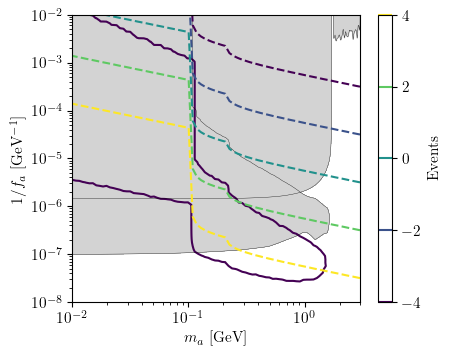

In [ ]:
fig, ax = pt.std_fig()

X,Y,Z = np.load('data/ICARUS_rate.npy', allow_pickle=True)
c = ax.contour(X, Y, Z, levels=[1000])

# BaBar Limit
ma, qsi = np.genfromtxt("data/digitized/BABAR_leptophilic.dat", unpack=True)
ax.fill_between(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, qsi/qsi, label='BABAR', color='lightgrey', linestyle='-')
ax.plot(ma, (1+(ma<const.m_tau - const.m_e)*1e100)*qsi/const.vev_EW, label='BABAR', color='black', linestyle='-', lw=0.25)

# Tau --> e alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_e, 1000)
# br_tau_to_e_alp = np.where(ma < const.m_tau - const.m_e, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(2.7e-3/br_tau_to_e_alp), np.sqrt(1/br_tau_to_e_alp), facecolor='lightgrey', edgecolor='black', linestyle='--', zorder=-100)

# # Tau --> mu alp 
# ma = np.geomspace(1e-3, const.m_tau - const.m_mu, 1000)
# br_tau_to_mu_alp = np.where(ma < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * pow(1.-pow(ma/const.m_tau,2),2) / 2.3e-12, 0)
# ax.fill_between(ma, np.sqrt(4.5e-3/br_tau_to_mu_alp), np.sqrt(1/br_tau_to_mu_alp), facecolor='lightgrey', edgecolor='black', linestyle=':', zorder=-100)

ma = np.geomspace(1e-3, 3, 100)
inv_fa = np.geomspace(1e-9,1e-2, 100, endpoint=True)
MA, INV_FA = np.meshgrid(ma, inv_fa)

ma_limit, B_limit_90CL = np.genfromtxt("data/digitized/BelleII_tau_to_mu_a.dat", unpack=True)
B_limit_90CL_interp = np.interp(MA, ma_limit, B_limit_90CL, left=1e100, right=1e100)

p_alp_avg = 10.58/4
P_decay = prob_decay(MA, p_alp_avg, Gamma_alp(MA, 1/INV_FA), 100, 100e100) # 10 cm travel
BR_tau_mu_a = 1/B_limit_90CL_interp * P_decay * np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1,1e100], colors=['lightgrey'], linestyles='-', linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)

BR_tau_mu_a = np.where(MA < const.m_tau - const.m_mu, 1/16/np.pi * const.m_tau**3 * INV_FA**2 * pow(1.-pow(MA/const.m_tau,2),2) / 2.3e-12, 0)
c=ax.contourf(MA, INV_FA, BR_tau_mu_a, levels=[1e-1,1e100], colors=['lightgrey'], linestyles='-',linewidths=[0.00], alpha=1)
c=ax.contour(MA, INV_FA, BR_tau_mu_a, levels=[1e-1], colors=['black'], linestyles='-', linewidths=[0.25], alpha=1)



Z = const.get_decay_rate_in_cm(Gamma_alp(MA, 1/INV_FA))
c=ax.contour(MA, INV_FA, np.log10(Z), levels=[-4,-2,0,2,4], cmap='viridis', linestyles='--', lw=0.1, alpha=1)
plt.colorbar(c, label='Events')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$1/f_a$ [GeV$^{-1}$]')
ax.set_xlabel(r'$m_a$ [GeV]')

ax.set_ylim(1e-8,1e-2)
ax.set_xlim(1e-2,3)

NameError: name 'mask_alp_in_acc' is not defined

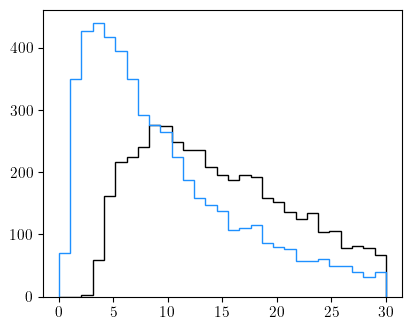

In [ ]:
bins = np.linspace(0,30,30)

fig, ax = pt.std_fig()
_ = ax.hist(df_taus.E, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0], bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)


# _ = ax.hist(df_taus.E[mask_alp_in_acc], bins=bins, histtype='stepfilled', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0][mask_alp_in_acc], bins=bins, histtype='stepfilled', color='dodgerblue', label=r'$a$ in ICARUS ($\times 10^4$)', weights=1e4*eff_dphi*np.ones((mask_alp_in_acc).sum()))

ax.set_title(fr'$\tau^\pm \to \mu^\pm a$ from NuMI ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend(frameon=True)
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$E$ [GeV]')
ax.set_xlim(bins.min(), bins.max())
# ax.set_yscale('log')

fig.savefig('plots/energy_tau_to_mu_alp.pdf', bbox_inches='tight', dpi=300)

In [ ]:
geom_acceptance

np.float64(3.5759523900593936e-05)

NameError: name 'mask_alp_in_acc' is not defined

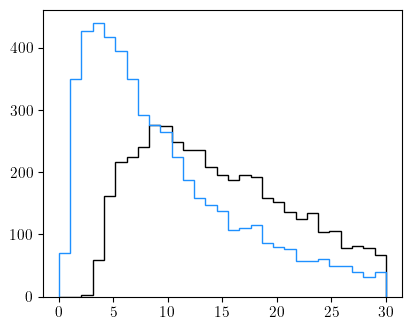

In [59]:
bins = np.linspace(0,30,30)

fig, ax = pt.std_fig()
_ = ax.hist(df_taus.E, bins=bins, histtype='step', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0], bins=bins, histtype='step', color='dodgerblue', label=r'$a$')#weights=df_taus.weight)


# _ = ax.hist(df_taus.E[mask_alp_in_acc], bins=bins, histtype='stepfilled', color='black', label=r'$\tau^\pm$')#weights=df_taus.weight)
_ = ax.hist(p4_alp[:,0][mask_alp_in_acc], bins=bins, histtype='stepfilled', color='dodgerblue', label=r'$a$ in ICARUS ($\times 10^4$)', weights=1e4*eff_dphi*np.ones((mask_alp_in_acc).sum()))

ax.set_title(fr'$\tau^\pm \to \mu^\pm a$ from NuMI ($m_{{a}} = {1e3*m_alp:.0f}$ MeV)')
ax.legend(frameon=True)
ax.set_ylabel(r'Events (a.u.)')
ax.set_xlabel(r'$E$ [GeV]')
ax.set_xlim(bins.min(), bins.max())
# ax.set_yscale('log')

fig.savefig('plots/energy_tau_to_mu_alp.pdf', bbox_inches='tight', dpi=300)

In [ ]:
geom_acceptance

np.float64(3.5759523900593936e-05)